In [1]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
url = "https://raw.githubusercontent.com/jcln94/machine_learning_UC/main/DATA_1_small_business_loan_approval.csv"
data = pd.read_csv(url)
data.shape

(2102, 35)

In [3]:
data.head()

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
0,0,1004285007,SIMPLEX OFFICE SOLUTIONS,ANAHEIM,CA,92801,CALIFORNIA BANK & TRUST,CA,532420,15074,2001,36,1,1.0,0,0,1,0,Y,N,NaN,15095.0,32812,0,P I F,0,30000,15000,0,0,0.5,0,1080,16175.0,0
1,1,1004535010,DREAM HOME REALTY,TORRANCE,CA,90505,CALIFORNIA BANK & TRUST,CA,531210,15130,2001,56,1,1.0,0,0,1,0,Y,N,NaN,15978.0,30000,0,P I F,0,30000,15000,0,0,0.5,1,1680,17658.0,0
2,0,1005005006,"Winset, Inc. dba Bankers Hill",SAN DIEGO,CA,92103,CALIFORNIA BANK & TRUST,CA,531210,15188,2001,36,10,1.0,0,0,1,0,Y,N,NaN,15218.0,30000,0,P I F,0,30000,15000,0,0,0.5,0,1080,16298.0,0
3,1,1005535001,Shiva Management,SAN DIEGO,CA,92108,CALIFORNIA BANK & TRUST,CA,531312,15719,2003,36,6,1.0,0,0,1,0,Y,N,NaN,15736.0,50000,0,P I F,0,50000,25000,0,0,0.5,0,1080,16816.0,0
4,1,1005996006,"GOLD CROWN HOME LOANS, INC",LOS ANGELES,CA,91345,SBA - EDF ENFORCEMENT ACTION,CO,531390,16840,2006,240,65,1.0,3,65,1,1,0,N,NaN,16903.0,343000,0,P I F,0,343000,343000,0,1,1.0,0,7200,24103.0,0


In [4]:
def cekna(df):
    col = []
    d_type = []
    na = []
    na_value = []
    
    
    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        na.append(df[i].isna().any())
        na_value.append((df[i].isnull().sum() / len(df[i])) * 100)
   
    return pd.DataFrame({'Column': col, 'd_type': d_type, 'Is NA': na, 'NA_value':na_value})
    

In [5]:
cekna(data)

,Column,d_type,Is NA,NA_value
0,Selected,int64,False,0.000000
1,LoanNr_ChkDgt,int64,False,0.000000
2,Name,object,False,0.000000
3,City,object,False,0.000000
4,State,object,False,0.000000
5,Zip,int64,False,0.000000
6,Bank,object,True,0.142721
7,BankState,object,True,0.142721
8,NAICS,int64,False,0.000000
9,ApprovalDate,int64,False,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76e8300d10>,
      dtype=object)

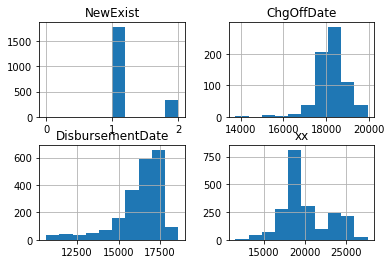

In [6]:
#dari data numerik yang memiliki NA , kita bisa membuat dataframe baru untuk mlihat histogramnya
#yang berguna  untuk menentukan metoda apa yang akan digunakan untuk mengisi NA
datana = data[['NewExist','ChgOffDate','DisbursementDate','xx']]
datana.hist()

In [7]:
data.describe()
#Untuk melihat deskripsi pada setiap kolom 

,Selected,LoanNr_ChkDgt,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
count,2102.000000,2.102000e+03,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2101.000000,2102.000000,2102.000000,2102.000000,2102.000000,697.000000,2099.000000,2.102000e+03,2102.0,2.102000e+03,2.102000e+03,2.102000e+03,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2099.000000,2102.000000
mean,0.500000,4.469172e+09,92698.612274,531630.902950,16179.587060,2004.035680,126.980495,10.150809,1.153736,2.549952,5.803996,1961.758325,0.949572,18224.817791,16264.266317,2.427372e+05,0.0,2.002908e+04,2.330641e+05,1.891759e+05,0.154139,0.274500,0.671055,0.068506,3809.414843,20076.896141,0.326356
std,0.500119,2.530069e+09,1878.208435,521.836986,1454.931276,4.006321,93.798944,34.402420,0.362099,8.010175,18.977996,11239.816973,0.410856,732.806567,1450.793956,3.382861e+05,0.0,7.543229e+04,3.436310e+05,2.989268e+05,0.361168,0.446368,0.186519,0.252673,2813.968318,2854.510377,0.468991
min,0.000000,1.004285e+09,65757.000000,531110.000000,10554.000000,1989.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13752.000000,10623.000000,4.835000e+03,0.0,0.000000e+00,4.500000e+03,2.250000e+03,0.000000,0.000000,0.296770,0.000000,0.000000,11524.000000,0.000000
25%,0.000000,2.392978e+09,91402.000000,531210.000000,15695.750000,2003.000000,60.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,17860.000000,15795.000000,4.000000e+04,0.0,0.000000e+00,3.000000e+04,1.500000e+04,0.000000,0.000000,0.500000,0.000000,1800.000000,18316.500000,0.000000
50%,0.500000,3.621730e+09,92559.500000,531312.000000,16556.000000,2005.000000,84.000000,3.000000,1.000000,0.000000,2.000000,1.000000,1.000000,18302.000000,16648.000000,1.000000e+05,0.0,0.000000e+00,6.100000e+04,4.168000e+04,0.000000,0.000000,0.500000,0.000000,2520.000000,19270.000000,0.000000
75%,1.000000,6.551607e+09,94127.750000,532230.000000,17149.750000,2007.000000,240.000000,8.000000,1.000000,2.000000,5.000000,1.000000,1.000000,18548.000000,17225.000000,3.000000e+05,0.0,1.507350e+04,3.000000e+05,2.397562e+05,0.000000,1.000000,0.850000,0.000000,7200.000000,22335.000000,1.000000
max,1.000000,9.958873e+09,96161.000000,533110.000000,18911.000000,2012.000000,306.000000,650.000000,2.000000,130.000000,535.000000,89658.000000,2.000000,19936.000000,18609.000000,2.315000e+06,0.0,1.509550e+06,2.350000e+06,2.115000e+06,1.000000,1.000000,1.000000,1.000000,9180.000000,27598.000000,1.000000


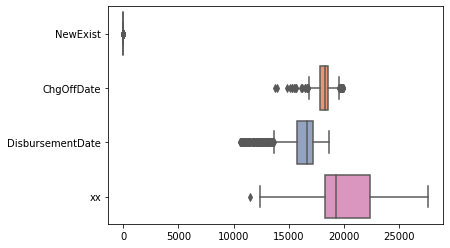

In [8]:
sns.boxplot(data=datana, orient="h", palette="Set2")

# Data Preparation

In [9]:
def report(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    
    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
    
    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques})

In [10]:
report(data)

,Column,d_type,unique_sample,n_uniques
0,Selected,int64,"[0, 1]",2
1,LoanNr_ChkDgt,int64,"[1004285007, 1004535010, 1005005006, 100553500...",2102
2,Name,object,"[SIMPLEX OFFICE SOLUTIONS, DREAM HOME REALTY, ...",2005
3,City,object,"[ANAHEIM, TORRANCE, SAN DIEGO, LOS ANGELES, SA...",519
4,State,object,[CA],1
5,Zip,int64,"[92801, 90505, 92103, 92108, 91345]",814
6,Bank,object,"[CALIFORNIA BANK & TRUST, SBA - EDF ENFORCEMEN...",154
7,BankState,object,"[CA, CO, OH, NV, NC]",21
8,NAICS,int64,"[532420, 531210, 531312, 531390, 531320]",24
9,ApprovalDate,int64,"[15074, 15130, 15188, 15719, 16840]",1367


In [11]:
# Fill Missing Values

data['NewExist'].fillna(data['NewExist'].median(), inplace=True)
data['ChgOffDate'].fillna(data['ChgOffDate'].median(), inplace=True)
data['DisbursementDate'].fillna(data['DisbursementDate'].median(), inplace=True)
data['xx'].fillna(data['xx'].median(), inplace=True)

In [12]:
cekna(data)

,Column,d_type,Is NA,NA_value
0,Selected,int64,False,0.000000
1,LoanNr_ChkDgt,int64,False,0.000000
2,Name,object,False,0.000000
3,City,object,False,0.000000
4,State,object,False,0.000000
5,Zip,int64,False,0.000000
6,Bank,object,True,0.142721
7,BankState,object,True,0.142721
8,NAICS,int64,False,0.000000
9,ApprovalDate,int64,False,0.000000


Drop variabel identifikasi

In [13]:
data = data.drop(['LoanNr_ChkDgt', 'Selected', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 
                  'BalanceGross', 'UrbanRural'], axis=1)

Drop data tanggal

In [14]:
data = data.drop(['ApprovalDate', 'ChgOffDate', 'DisbursementDate'], axis=1)

Encoding 

In [15]:
# replacing values (other than Y will be N)
# FranchiseCode will be replaced as 1 (if business has franchise) and 0 (if business doesn't have franchise)
data.loc[data['RevLineCr'] != 'Y', 'RevLineCr'] = 'N'
data.loc[data['LowDoc'] != 'Y', 'LowDoc'] = 'N'
data.loc[data['FranchiseCode'] == 1, 'FranchiseCode'] = 0
data.loc[data['FranchiseCode'] != 0, 'FranchiseCode'] = 1

In [16]:
report(data)

,Column,d_type,unique_sample,n_uniques
0,ApprovalFY,int64,"[2001, 2003, 2006, 2004, 1997]",24
1,Term,int64,"[36, 56, 240, 84, 269]",170
2,NoEmp,int64,"[1, 10, 6, 65, 2]",83
3,NewExist,float64,"[1.0, 2.0, 0.0]",3
4,CreateJob,int64,"[0, 3, 2, 7, 8]",43
5,RetainedJob,int64,"[0, 65, 2, 1, 20]",62
6,FranchiseCode,int64,"[0, 1]",2
7,RevLineCr,object,"[Y, N]",2
8,LowDoc,object,"[N, Y]",2
9,DisbursementGross,int64,"[32812, 30000, 50000, 343000, 55825]",1182


In [17]:
labelencoder = LabelEncoder()
data['RevLineCr'] = labelencoder.fit_transform(data['RealEstate'])
data['LowDoc'] = labelencoder.fit_transform(data['LowDoc'])
data['MIS_Status'] = labelencoder.fit_transform(data['MIS_Status'])
report(data)

,Column,d_type,unique_sample,n_uniques
0,ApprovalFY,int64,"[2001, 2003, 2006, 2004, 1997]",24
1,Term,int64,"[36, 56, 240, 84, 269]",170
2,NoEmp,int64,"[1, 10, 6, 65, 2]",83
3,NewExist,float64,"[1.0, 2.0, 0.0]",3
4,CreateJob,int64,"[0, 3, 2, 7, 8]",43
5,RetainedJob,int64,"[0, 65, 2, 1, 20]",62
6,FranchiseCode,int64,"[0, 1]",2
7,RevLineCr,int64,"[0, 1]",2
8,LowDoc,int64,"[0, 1]",2
9,DisbursementGross,int64,"[32812, 30000, 50000, 343000, 55825]",1182


In [18]:
data.isna().any()

ApprovalFY           False
Term                 False
NoEmp                False
NewExist             False
CreateJob            False
RetainedJob          False
FranchiseCode        False
RevLineCr            False
LowDoc               False
DisbursementGross    False
MIS_Status           False
ChgOffPrinGr         False
GrAppv               False
SBA_Appv             False
New                  False
RealEstate           False
Portion              False
Recession            False
daysterm             False
xx                   False
Default              False
dtype: bool

In [19]:
data.to_csv('data_clean.csv')
df = pd.read_csv('data_clean.csv').iloc[:, 1:]
df.head()

,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,RevLineCr,LowDoc,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
0,2001,36,1,1.0,0,0,0,0,0,32812,1,0,30000,15000,0,0,0.5,0,1080,16175.0,0
1,2001,56,1,1.0,0,0,0,0,0,30000,1,0,30000,15000,0,0,0.5,1,1680,17658.0,0
2,2001,36,10,1.0,0,0,0,0,0,30000,1,0,30000,15000,0,0,0.5,0,1080,16298.0,0
3,2003,36,6,1.0,0,0,0,0,0,50000,1,0,50000,25000,0,0,0.5,0,1080,16816.0,0
4,2006,240,65,1.0,3,65,0,1,0,343000,1,0,343000,343000,0,1,1.0,0,7200,24103.0,0


Correlation among each variables

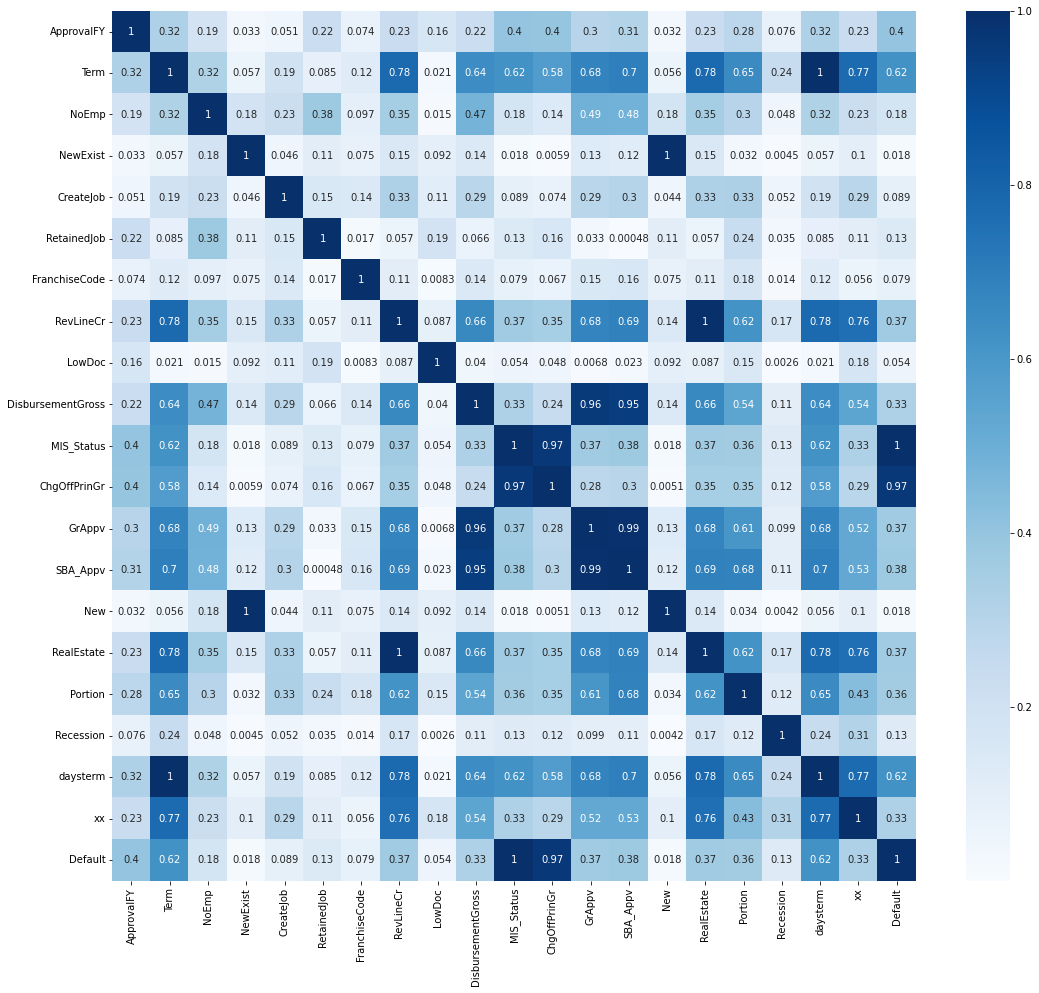

In [20]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(method='spearman').abs(), cmap=plt.cm.Blues, annot=True)

Remove correlated features with threshold > 0.85 (redundant features)

In [21]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) > threshold:
        colname = corr_matrix.columns[j]
        col_corr.add(colname)
  return col_corr

In [22]:
corr_features = correlation(df, 0.85)
corr_features

{'DisbursementGross',
 'GrAppv',
 'MIS_Status',
 'NewExist',
 'RealEstate',
 'RevLineCr',
 'Term',
 'daysterm'}

In [23]:
df = df.drop(corr_features, axis=1)

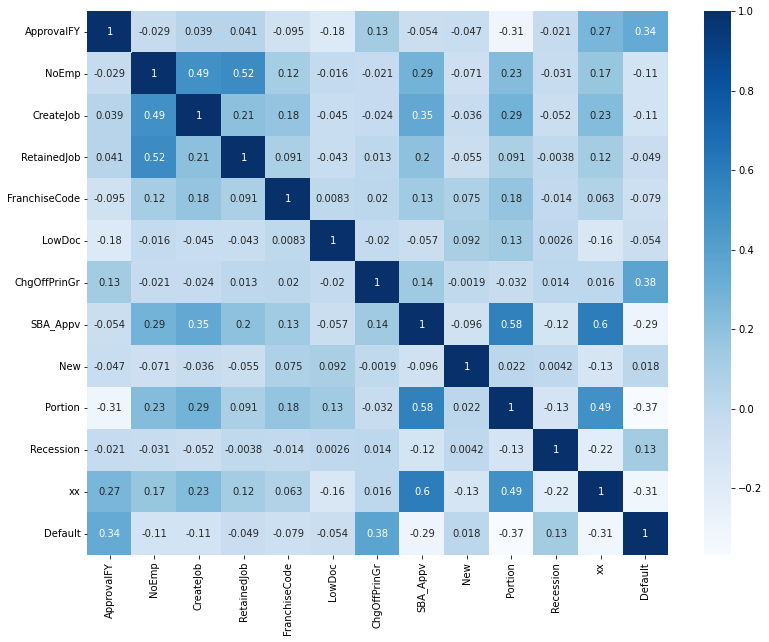

In [24]:
plt.figure(figsize=(13,10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Blues)
plt.show()

Finding 6 best features using Univariate Selection

In [25]:
X,y = df.loc[:,df.columns != 'Default'], df.loc[:,'Default']

In [26]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

            Specs         Score
7        SBA_Appv  8.635022e+07
6    ChgOffPrinGr  8.627104e+07
11             xx  8.196460e+04
1           NoEmp  2.942854e+03
2       CreateJob  6.135137e+02
3     RetainedJob  3.070797e+02
10      Recession  3.235524e+01
9         Portion  1.471144e+01
4   FranchiseCode  1.258125e+01
5          LowDoc  6.043331e+00


In [27]:
new_df = df[['SBA_Appv', 'ChgOffPrinGr', 'xx', 'CreateJob', 'LowDoc', 'Recession', 'Default']]
new_df.head()

,SBA_Appv,ChgOffPrinGr,xx,CreateJob,LowDoc,Recession,Default
0,15000,0,16175.0,0,0,0,0
1,15000,0,17658.0,0,0,1,0
2,15000,0,16298.0,0,0,0,0
3,25000,0,16816.0,0,0,0,0
4,343000,0,24103.0,3,0,0,0


In [28]:
new_df.describe()

,SBA_Appv,ChgOffPrinGr,xx,CreateJob,LowDoc,Recession,Default
count,2.102000e+03,2.102000e+03,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000
mean,1.891759e+05,2.002908e+04,20075.744529,2.549952,0.019505,0.068506,0.326356
std,2.989268e+05,7.543229e+04,2852.634406,8.010175,0.138325,0.252673,0.468991
min,2.250000e+03,0.000000e+00,11524.000000,0.000000,0.000000,0.000000,0.000000
25%,1.500000e+04,0.000000e+00,18319.500000,0.000000,0.000000,0.000000,0.000000
50%,4.168000e+04,0.000000e+00,19270.000000,0.000000,0.000000,0.000000,0.000000
75%,2.397562e+05,1.507350e+04,22326.000000,2.000000,0.000000,0.000000,1.000000
max,2.115000e+06,1.509550e+06,27598.000000,130.000000,1.000000,1.000000,1.000000


Processing

In [29]:
X,y = new_df.loc[:, new_df.columns != 'Default'], new_df.loc[:,'Default']

In [30]:
# Normalisasi data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
x_scaled.head()

,SBA_Appv,ChgOffPrinGr,xx,CreateJob,LowDoc,Recession
0,0.006035,0.0,0.289349,0.000000,0.0,0.0
1,0.006035,0.0,0.381610,0.000000,0.0,1.0
2,0.006035,0.0,0.297001,0.000000,0.0,0.0
3,0.010768,0.0,0.329227,0.000000,0.0,0.0
4,0.161283,0.0,0.782568,0.023077,0.0,0.0


# Model

##Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold

In [32]:
k = 5
kf = KFold(n_splits=k, random_state=None)

In [33]:
for train_index, test_index in kf.split(x_scaled):
  x_train, x_test = x_scaled.iloc[train_index, :], x_scaled.iloc[test_index, :]
  y_train, y_test = y[train_index], y[test_index]

GNB = GaussianNB()
GNB.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [34]:
# Lakukan training dengan dataset train
pred_values_GNB = GNB.predict(x_test)
pred_values_GNB

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [35]:
accuracy_GNB = GNB.score(x_test, y_test)
accuracy_GNB

0.9833333333333333

In [36]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, pred_values_GNB)
cf_matrix

array([[339,   6],
       [  1,  74]])

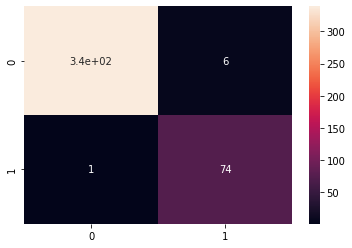

In [37]:
sns.heatmap(cf_matrix, annot=True)

In [38]:
from sklearn.metrics import f1_score
print('F1-Score: {}'.format(f1_score(y_test, pred_values_GNB)))

F1-Score: 0.9548387096774195


In [39]:
#dummy data 1
GNB.predict([[2.3, 1.5, 22326, 2, 0, 0]])

array([0])

In [40]:
#dummy data 2
GNB.predict([[2.112e+04, 1.14320e+05, 21212, 90, 1, 0]])

array([1])

##KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
# Buat model menggunakan KNeighborsClassifier dengan K = 4
knn = KNeighborsClassifier(n_neighbors = 4)

In [42]:
# Lakukan training dengan dataset train
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [43]:
# Lakukan prediksi menggunakan x_test lalu print class hasil prediksi
prediction_KNN = knn.predict(x_test)
print('prediction : {}'.format(prediction_KNN))

prediction : [0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0]


In [44]:
# Print akurasi dari data testing menggunakan score
from sklearn.metrics import confusion_matrix, accuracy_score

print("Accuracy Score: ", knn.score(x_test, y_test))

Accuracy Score:  0.9619047619047619


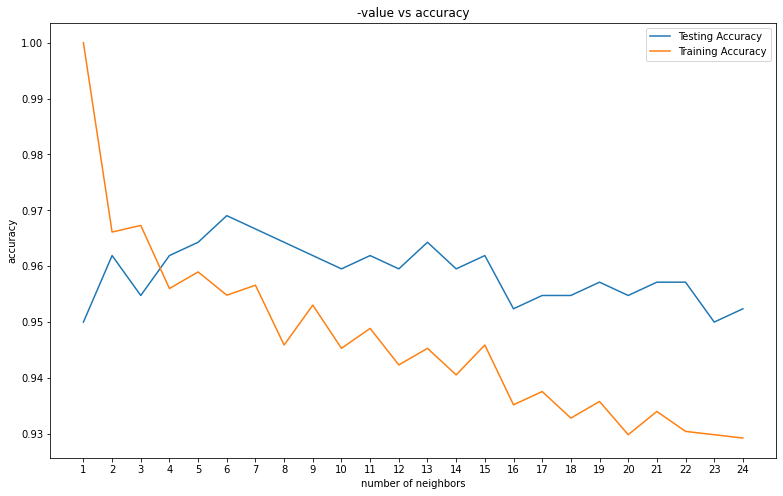

Best accuracy is 0.969047619047619 with k = 6


In [45]:
# Model complexity
neig = np.arange(1,25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
  # k fom 1 to 25
  knn = KNeighborsClassifier(n_neighbors=k)
  #fit with knn
  knn.fit(x_train, y_train)
  #train accuracy
  train_accuracy.append(knn.score(x_train, y_train))
  #test accuracy
  test_accuracy.append(knn.score(x_test,y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(neig,test_accuracy, label= "Testing Accuracy")
plt.plot(neig,train_accuracy, label= "Training Accuracy")
plt.legend()
plt.title('-value vs accuracy')
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print('Best accuracy is {} with k = {}'.format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [46]:
knn = KNeighborsClassifier(n_neighbors = 6)

In [47]:
# Lakukan training dengan dataset train
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [48]:
# Print akurasi dari data testing menggunakan score
print("Accuracy Score: ", knn.score(x_test, y_test))

Accuracy Score:  0.969047619047619


In [49]:
# Lakukan prediksi menggunakan x_test lalu print class hasil prediksi
prediction = knn.predict(x_test)
print('prediction : {}'.format(prediction))

prediction : [0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 0]


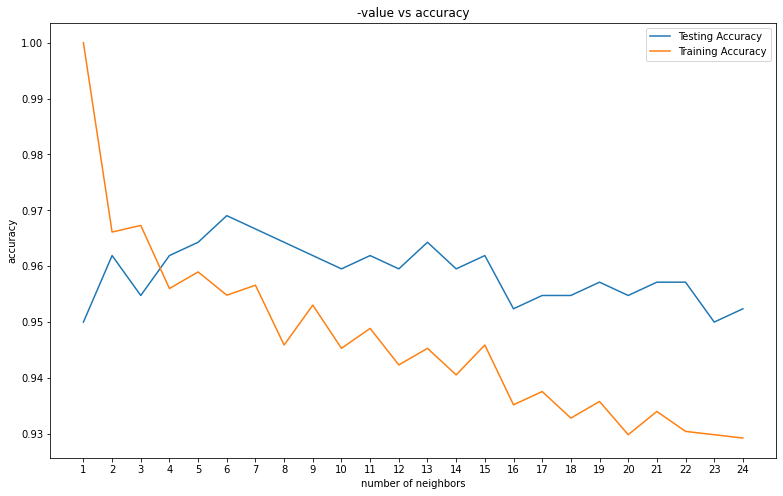

Best accuracy is 0.969047619047619 with k = 6


In [50]:
import numpy as np
# Model complexity
neig = np.arange(1,25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
  # k fom 1 to 25
  knn = KNeighborsClassifier(n_neighbors=k)
  #fit with knn
  knn.fit(x_train, y_train)
  #train accuracy
  train_accuracy.append(knn.score(x_train, y_train))
  #test accuracy
  test_accuracy.append(knn.score(x_test,y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(neig,test_accuracy, label= "Testing Accuracy")
plt.plot(neig,train_accuracy, label= "Training Accuracy")
plt.legend()
plt.title('-value vs accuracy')
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print('Best accuracy is {} with k = {}'.format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [51]:
cm = confusion_matrix(y_test, prediction_KNN)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[343   2]
 [ 14  61]]


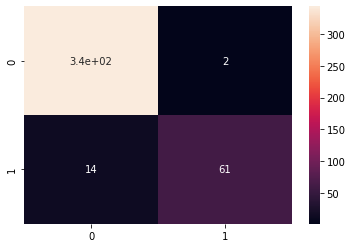

In [52]:
# show heatmap
sns.heatmap(cm, annot=True)

In [53]:
from sklearn.metrics import f1_score
print('F1-Score : {}'.format(f1_score(y_test, prediction)))

F1-Score : 0.9064748201438849


In [54]:
#dummy data 1
knn.predict([[4.164, 1.5, 21116, 30, 0, 0]])

array([0])

In [55]:
#dummy data 2
knn.predict([[2.120e+05, 1.209550e+06, 19250, 105, 1, 1]])

array([1])

##SVM

In [56]:
from sklearn.svm import SVC

### Linear

In [57]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
yHat = svc_linear.predict(x_test)

In [59]:
from sklearn import metrics
print("Training set accuracy = ", metrics.accuracy_score(y_train, svc_linear.predict(x_train)))
print("Test set accuracy = ", metrics.accuracy_score(y_test, yHat))

Training set accuracy =  0.6890606420927468
Test set accuracy =  0.8857142857142857


In [60]:
from sklearn.metrics import confusion_matrix
# Matriks confusion array using sklearn
cf_matrix = confusion_matrix(y_test, yHat)
cf_matrix

array([[340,   5],
       [ 43,  32]])

In [61]:
from sklearn.metrics import f1_score
print('F1-Score : {}'.format(f1_score(y_test, yHat)))

F1-Score : 0.5714285714285715


In [62]:
#dummy data 1
svc_linear.predict([[4.4212, 1.9, 16026, 20, 1, 0]])

array([0])

In [63]:
#dummy data 2
svc_linear.predict([[2.362e+04, 1.19550e+06, 20898, 120, 1, 1]])

array([1])

### RBF

In [64]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [65]:
yHat = svc_rbf.predict(x_test)

In [66]:
from sklearn import metrics
print("Training set accuracy = ", metrics.accuracy_score(y_train, svc_rbf.predict(x_train)))
print("Test set accuracy = ", metrics.accuracy_score(y_test, yHat))

Training set accuracy =  0.8781212841854935
Test set accuracy =  0.95


In [67]:
from sklearn.metrics import confusion_matrix
# Matriks confusion array using sklearn
cf_matrix = confusion_matrix(y_test, yHat)
cf_matrix

array([[340,   5],
       [ 16,  59]])

In [68]:
from sklearn.metrics import f1_score
print('F1-Score : {}'.format(f1_score(y_test, yHat)))

F1-Score : 0.8489208633093526


In [69]:
#dummy data 1
svc_rbf.predict([[4.4212, 1.9, 16026, 20, 1, 0]])

array([0])

In [70]:
#dummy data 2
svc_rbf.predict([[2.362e+04, 1.19550e+06, 20898, 120, 1, 1]])

array([0])

### Polynomial

In [71]:
svc_poly = SVC(kernel='poly')
svc_poly.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [72]:
yHat = svc_poly.predict(x_test)

In [73]:
from sklearn import metrics
print("Training set accuracy = ", metrics.accuracy_score(y_train, svc_poly.predict(x_train)))
print("Test set accuracy = ", metrics.accuracy_score(y_test, yHat))

Training set accuracy =  0.7675386444708681
Test set accuracy =  0.9095238095238095


In [74]:
from sklearn.metrics import confusion_matrix
# Matriks confusion array using sklearn
cf_matrix = confusion_matrix(y_test, yHat)
cf_matrix

array([[345,   0],
       [ 38,  37]])

In [75]:
from sklearn.metrics import f1_score
print('F1-Score : {}'.format(f1_score(y_test, yHat)))

F1-Score : 0.6607142857142857


In [76]:
#dummy data 1
svc_poly.predict([[4.4212, 1.9, 16026, 20, 1, 0]])

array([0])

In [77]:
#dummy data 2
svc_poly.predict([[2.362e+04, 1.19550e+06, 20898, 120, 1, 1]])

array([1])

# Evaluation

Berdasarkan dari 3 model diatas bisa kita simpulkan berdasarkan perbandingan hasil akurasinya yaitu,
1. KNN         : 96.9%
2. Naive Bayes : 98.3%
3. SVM         : 95%

dan untuk F1-Score setiap masing-masing model yaitu,
1. KNN         : 90.6%
2. Naive Bayes : 95.4%
3. SVM         : 84.8 %

Dari 3 model tersebut kami dapat menyimpulkan bahwa 6 dari 10 variable teratas yang kami pilih untuk dianalisa, apakah variable tersebut memiliki pengaruh terhadap persejutuan bisnis kecil tesebut akan mendapatkan pinjaman atau tidak dari bank. Hasil evaluasi setiap model yang kami gunakan menunjukan F1-Score diatas memiliki hasil yang baik.

FEEDBACK:

Kekurangan: 
1. Penjelasan variable yang tidak begitu jelas.
2. Penulisan data yang tidak tepat dan juga ada yang kosong.
3. Waktu pengerjaan yang cukup singkat.
5. Pengerjaan yang tidak beratur.

Penyelesaian :
1. Browsing di internet terkait dataset yang serupa.
2. Melakukan pengecekan berulang kali secara lebih detail.
3. Pembagian dan penjadwalan tugas kepada kelompok.
4. Double check dan revisi beberapa kali.

Untuk kedepannya kami berharap memiliki waktu yang lebih lama setidaknya 14 hari untuk pengerjaan. Kami yang awalnya masih belum mengerti betul python dan pada ahkirnya kami bisa menyelesaikan proyek ini merupakan sebuah pencapaian yang jujur kami bilang 'MANTAB'